In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

In [110]:
df = pd.read_csv('/Users/adamsantos/ds/metis/metisgh/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [111]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


# Challenge 1

In [112]:
df['ones']=1
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1


In [113]:
lm1 = LinearRegression()
lm1.fit(np.array(df['ones']).reshape(-1, 1),df['DomesticTotalGross'])

y_pred1 = lm1.predict(np.array(df['ones']).reshape(-1, 1))



These predictions predict the mean of Domestic Total Gross

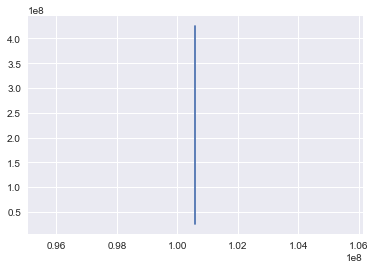

In [114]:
plt.plot(y_pred1,df['DomesticTotalGross'])

(array([47., 21., 15.,  3.,  3.,  4.,  3.,  0.,  1.,  3.]),
 array([-7.50286242e+07, -3.51186446e+07,  4.79133498e+06,  4.47013146e+07,
         8.46112942e+07,  1.24521274e+08,  1.64431253e+08,  2.04341233e+08,
         2.44251213e+08,  2.84161192e+08,  3.24071172e+08]),
 <a list of 10 Patch objects>)

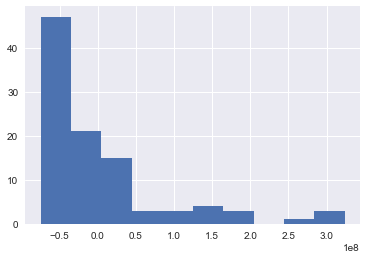

In [115]:
plt.hist(df['DomesticTotalGross']-y_pred1)

The residual historgram shows that a lot of movies are clustered around the mean domestic total gross and there are a few movies that make a lot more than the mean.

# Challenge 2

In [116]:
df = df[np.isfinite(df['Budget'])]
df = df[np.isfinite(df['Runtime'])]

In [117]:
lm2 = LinearRegression()
lm2.fit(np.array(df['Budget']).reshape(-1, 1),df['DomesticTotalGross'])

y_pred2 = lm2.predict(np.array(df['Budget']).reshape(-1, 1))

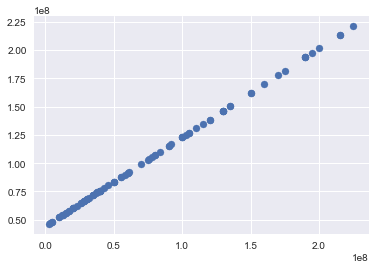

In [118]:
plt.scatter(df['Budget'],y_pred2)

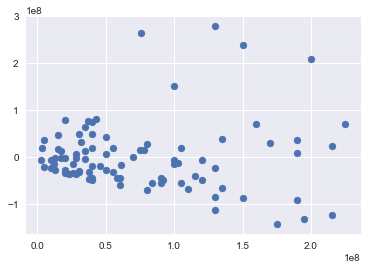

In [119]:
plt.scatter(df['Budget'],df['DomesticTotalGross']-y_pred2)

This model is predicting a linear relationship between the Budget of a movie and how much it makes, shown in the perfectly linear relationship between the feature and the target. The residual plot shows that the predictions are relatively close for movies with smaller budgets but vary widely for movies with higher budgets.

# Challenge 3

In [120]:
dums = pd.get_dummies(df['Rating'])
dums

df_merged = df.merge(dums, how='outer', left_index=True, right_index=True)

df_merged.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones,PG,PG-13,R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,1,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,1,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,1,0


In [121]:
lm3 = LinearRegression()
lm3.fit(dums,df['DomesticTotalGross'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
y_preds3=lm3.predict(dums)

In [123]:
def RMSE(actuals, preds): #root mean squared error
    return np.sqrt(np.mean((actuals - preds)**2))

In [124]:
r2=r2_score(y_preds3, df['DomesticTotalGross'])
rmse=RMSE(y_preds3, df['DomesticTotalGross'])

print(r2,rmse)

-12.522219954119198 83674147.86341752


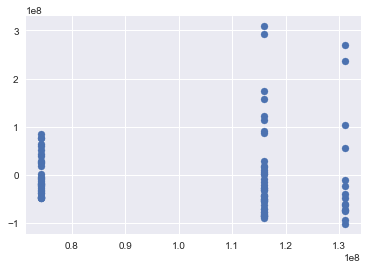

In [125]:
plt.scatter(y_preds3,df['DomesticTotalGross']-y_preds3)

It does not appear that rating has a huge effect on Total Domestic gross given low r^2 score and high rmse. The residual plot do not show a trend within each rating.

# Challenge 4

In [135]:
dums2 = pd.get_dummies(df['Director'])

df_merged2 = df_merged.merge(dums2, how='outer', left_index=True, right_index=True)

df_merged2.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ones,PG,PG-13,...,Seth Gordon,Shane Black,Shawn Levy,Spike Jonze,Stephen Frears,Steve McQueen (II),Thor Freudenthal,Todd Phillips,Tommy Wirkola,Zack Snyder
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1,0,1,...,0,1,0,0,0,0,0,0,0,0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [136]:
df_merged2.drop(['Title','DomesticTotalGross','Director','Rating','ReleaseDate'],axis=1, inplace=True)
df_merged2.head()

,Budget,Runtime,ones,PG,PG-13,R,Adam McKay,Alan Taylor,Alfonso Cuaron,Andres Muschietti,...,Seth Gordon,Shane Black,Shawn Levy,Spike Jonze,Stephen Frears,Steve McQueen (II),Thor Freudenthal,Todd Phillips,Tommy Wirkola,Zack Snyder
0,130000000.0,146,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,200000000.0,129,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,150000000.0,108,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,76000000.0,98,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,225000000.0,143,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [137]:
lm4 = LinearRegression()
lm4.fit(df_merged2,df['DomesticTotalGross'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
y_preds4=lm4.predict(df_merged2)

In [139]:
r2=r2_score(y_preds4, df['DomesticTotalGross'])
rmse=RMSE(y_preds4, df['DomesticTotalGross'])

print(r2,rmse)

1.0 1.489978298198763e-06


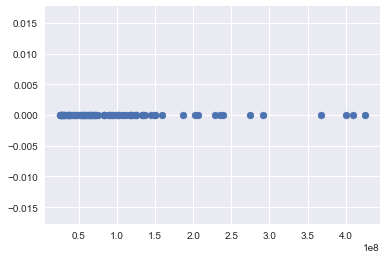

In [140]:
plt.scatter(y_preds4,df['DomesticTotalGross']-y_preds4)

It's perfect! Haha, it's evaluating on the training set which is not a good way to evaluate the model because it's overfit...

# Challenge 5

In [163]:
X_train, X_test, y_train, y_test = train_test_split(df_merged2,df['DomesticTotalGross'], test_size=0.2,random_state=42)

In [164]:
lm5 = LinearRegression()
lm5.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
y_preds5=lm5.predict(X_test)

In [166]:
r2=r2_score(y_preds5, y_test)
rmse=RMSE(y_preds5, y_test)

print(r2,rmse)

-2.8102144210101847 79991568.80295637


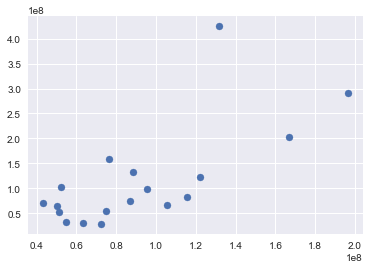

In [168]:
plt.scatter(y_preds5,y_test)

Some outliers are skewing the scores and making the predictions look poor. If I were to do this again, I would remove these outliers.